In [8]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

data = pd.read_csv('titanic_train.csv')

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#年齢はばらつきが大きいので回帰補完。
#Cabinは使わない。
data_2 = data.interpolate(subset = ['Age'], method = 'linear')

In [14]:
#ダミー変数
sex_mapping = {'male': 0, 'female': 1}
data_2['Sex'] = data_2['Sex'].map(sex_mapping)
data_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,44.5,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [16]:
#死者、生存者に分ける。
final_data = data_2.sort_values(by = ['Survived'], ascending = True)
final_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",0,32.000000,0,0,349242,7.8958,NaN,S
521,522,0,3,"Vovk, Mr. Janko",0,22.000000,0,0,349252,7.8958,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",0,33.000000,0,0,2624,7.2250,NaN,C
524,525,0,3,"Kassem, Mr. Fared",0,42.250000,0,0,2700,7.2292,NaN,C
525,526,0,3,"Farrell, Mr. James",0,40.500000,0,0,367232,7.7500,NaN,Q
527,528,0,1,"Farthing, Mr. John",0,44.500000,0,0,PC 17483,221.7792,C95,S
528,529,0,3,"Salonen, Mr. Johan Werner",0,39.000000,0,0,3101296,7.9250,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",0,23.000000,2,1,29104,11.5000,NaN,S
531,532,0,3,"Toufik, Mr. Nakli",0,9.500000,0,0,2641,7.2292,NaN,C


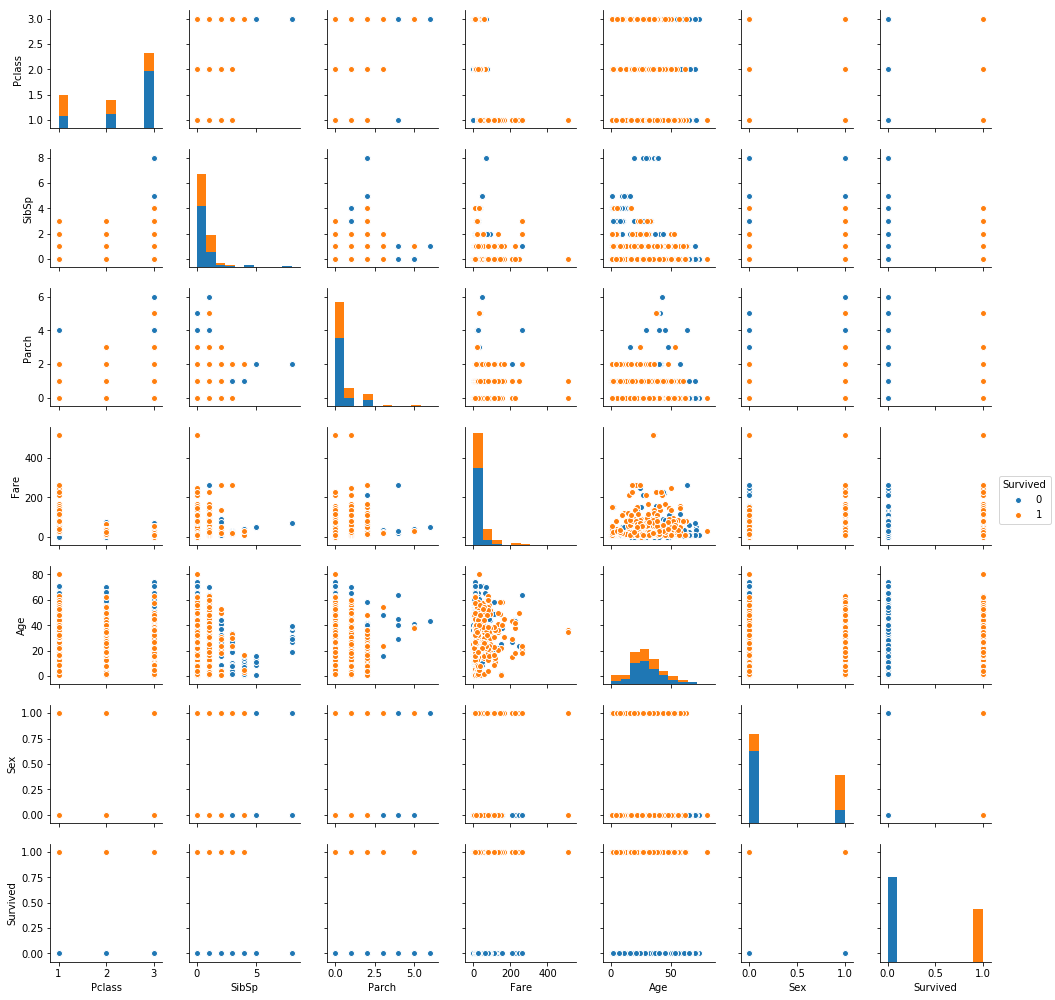

In [17]:
#相関を調べる
df_1 = pd.DataFrame(final_data, columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex', 'Survived'])
import seaborn as sns
sns.pairplot(df_1, hue = 'Survived', size = 2.0)
plt.show()

In [18]:
df_1.corr()

,Pclass,SibSp,Parch,Fare,Age,Sex,Survived
Pclass,1.000000,0.083081,0.018443,-0.549500,-0.304934,-0.131900,-0.338481
SibSp,0.083081,1.000000,0.414838,0.159651,-0.213410,0.114631,-0.035322
Parch,0.018443,0.414838,1.000000,0.216225,-0.170013,0.245489,0.081629
Fare,-0.549500,0.159651,0.216225,1.000000,0.087119,0.182333,0.257307
Age,-0.304934,-0.213410,-0.170013,0.087119,1.000000,-0.061332,-0.062164
Sex,-0.131900,0.114631,0.245489,0.182333,-0.061332,1.000000,0.543351
Survived,-0.338481,-0.035322,0.081629,0.257307,-0.062164,0.543351,1.000000


In [10]:
#まとめ
#金持ちの方が生存率がいい。(Pclass, Fare)
#男より女、大人より子供と老人が生存率が高い。
#Parch SibSp Fare がよく似ている。主成分分析で情報のロスが少なくしたまま、次元を減らすことができる（はず）。


In [19]:
#目的関数
y = pd.DataFrame(final_data, columns = ['Survived']).values
y = np.reshape(y, (-1))

In [20]:
#主成分分析
X_1 = pd.DataFrame(final_data, columns = [ 'SibSp', 'Parch', 'Fare']).values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_std_1 = scaler.fit_transform(X_1)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca_1 = pca.fit_transform(X_std_1)

In [21]:
#チェック
X_pca_1[:10]

array([[-0.25848614],
       [-0.81722502],
       [-0.81722502],
       [-0.82315999],
       [-0.82312283],
       [-0.818515  ],
       [ 1.07513107],
       [-0.81696667],
       [ 1.14793384],
       [-0.82312283]])

In [22]:
print(pca.explained_variance_ratio_)

[ 0.51496038]


In [23]:
#説明変数の準備
X_2 = pd.DataFrame(final_data, columns = ['Pclass', 'Sex', 'Age']).values
X_pca_1.shape
X_3 = np.c_[X_pca_1, X_2]

In [24]:
#ホールドアウト法
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=0)

In [25]:
#ランダム木
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
#ここで一度スコアを確認
print('train accuracy: %.3f' % rfc.score(X_train, y_train))
print('test  accuracy: %.3f' % rfc.score(X_test, y_test))

train accuracy: 0.838
test  accuracy: 0.828


In [27]:
#グリッドサーチでn_estimators, max_depthを調整

In [28]:
param_grid = {'n_estimators': [30, 40, 50, 60, 70, 80],
              'max_depth': [3, 4, 5, 6]}

In [29]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [30]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=kf)

In [31]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70, 80], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
#最適化された組み合わせ
gs.best_params_

{'max_depth': 4, 'n_estimators': 30}

In [33]:
#その時のスコア
gs.best_score_

0.8041733547351525

In [34]:
#テストでのスコア
gs.score(X_test, y_test)

0.80970149253731338

In [ ]:
#以下からはkaggleに提出用の処理

In [35]:
data_test = pd.read_csv('titanic_test.csv')

In [36]:
data_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [37]:
data_test['Sex'] = data_test['Sex'].map(sex_mapping)

In [38]:
data_test_2 = data_test.interpolate(method='linear')

In [39]:
data_test_2

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
5,3,0,14.0,0,0,9.2250
6,3,1,30.0,0,0,7.6292
7,2,0,26.0,1,1,29.0000
8,3,1,18.0,0,0,7.2292
9,3,0,21.0,2,0,24.1500


In [40]:
data_test_2.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [41]:
test_1 = pd.DataFrame(data_test_2, columns = [ 'SibSp', 'Parch', 'Fare']).values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_1)
test_std = scaler.fit_transform(test_1)
from sklearn.decomposition import PCA
pca_test = PCA(n_components=1)
test_pca = pca_test.fit_transform(test_std)

In [42]:
test_2 = pd.DataFrame(data_test_2, columns = ['Pclass', 'Sex', 'Age']).values
test_3 = np.c_[test_pca, test_2]

In [43]:
y_pred = gs.predict(test_3)

In [44]:
df_out = pd.read_csv('titanic_test.csv')
df_out["Survived"] = y_pred

In [45]:
df_submit = pd.DataFrame(df_out, columns=['PassengerId', 'Survived'])

In [46]:
df_submit.to_csv("submission_2.csv")

#kaggleで0.77033を記録